In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate
%matplotlib inline

### Smooth local paths
We will use cubic spirals to generate smooth local paths. Without loss of generality, as $\theta$ smoothly changes from 0 to 1, we impose a condition on the curvature as follows

$\kappa = f'(x) = K(x(1-x))^n $

This ensures curvature vanishes at the beginning and end of the path. Integrating, the yaw changes as
$\theta = \int_0^x f'(x')dx'$

With $n = 1$ we get a cubic spiral, $n=2$ we get a quintic spiral and so on. Let us use the sympy package to find the family of spirals

1. Declare $x$ a Symbol

2. You want to find Integral of $f'(x)$

3. You can choose $K$ so that all coefficients are integers

Verify if $\theta(0) = 0$ and $\theta(1) = 1$

In [ ]:
K =  30 #choose for cubic/quintic 6 for cubic, 30 for quintic
n =  2 #choose for cubic/ quintic 1 for cubic, 2 for quintic
x =  Symbol('x') #declare as Symbol
print(integrate(K*((x*(1-x))**n), x)) # complete the expression

6*x**5 - 15*x**4 + 10*x**3


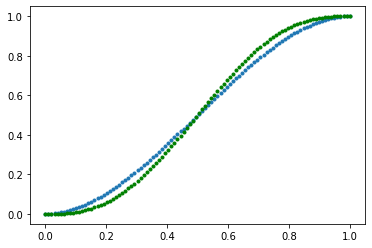

In [ ]:
x = np.linspace(0, 1, num=100)
thetas = -2*x**3 + 3*x**2
plt.plot(x,thetas,'.')
thetas = 6*x**5 - 15*x**4 + 10*x**3
plt.plot(x,thetas,'g.')

In [ ]:
#write function to compute a cubic spiral
#input/ output can be any theta
def cubic_spiral(theta_i, theta_f, n=100):
    x = np.linspace(0, 1, num=n)
    # -2*x**3 + 3*x**2
    return (theta_f - theta_i)*(-2*x**3 + 3*x**2) + theta_i

def quintic_spiral(theta_i, theta_f, n=100):
    x = np.linspace(0, 1, num=n)  
    # 6*x**5 - 15*x**4 + 10*x**3
    return (theta_f - theta_i)*(6*x**5 - 15*x**4 + 10*x**3) + theta_i

### Plotting
Plot cubic, quintic spirals along with how $\theta$ will change when moving in a circular arc. Remember circular arc is when  $\omega $ is constant


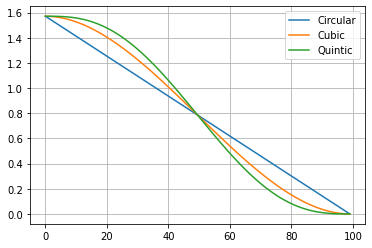

In [ ]:
plt.figure()
num_pts = 100
plt.plot(np.pi/2*(1-np.linspace(0,1,num_pts)), label='Circular')
plt.plot(cubic_spiral(np.pi/2,0,num_pts), label='Cubic')
plt.plot(quintic_spiral(np.pi/2,0,num_pts),label='Quintic')
plt.grid()
plt.legend()

## Trajectory

Using the spirals, convert them to trajectories $\{(x_i,y_i,\theta_i)\}$. Remember the unicycle model 

$dx = v\cos \theta dt$

$dy = v\sin \theta dt$

$\theta$ is given by the spiral functions you just wrote. Use cumsum() in numpy to calculate {}

What happens when you change $v$?

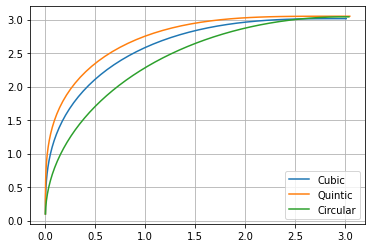

In [ ]:
v = 1
dt = 0.1
num_pts = 50
thetas = cubic_spiral(np.pi/2,0,num_pts)
x = np.cumsum(v*dt*np.cos(thetas))
y = np.cumsum(v*dt*np.sin(thetas))
# plot trajectories for circular/ cubic/ quintic
plt.figure()
plt.plot(x,y, label='Cubic')

thetas = quintic_spiral(np.pi/2,0,num_pts+2)
x = np.cumsum(v*dt*np.cos(thetas))
y = np.cumsum(v*dt*np.sin(thetas))
plt.plot(x,y, label='Quintic')

thetas = np.pi/2*(1-np.linspace(0,1,num_pts-2))
x = np.cumsum(v*dt*np.cos(thetas))
y = np.cumsum(v*dt*np.sin(thetas))
plt.plot(x,y, label='Circular')
plt.grid()
plt.legend()

## Symmetric poses

We have been doing only examples with $|\theta_i - \theta_f| = \pi/2$. 

What about other orientation changes? Given below is an array of terminal angles (they are in degrees!). Start from 0 deg and plot the family of trajectories

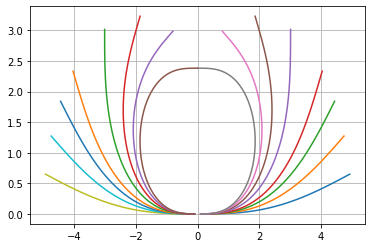

In [ ]:
dt = 0.1
thetas = [15, 30, 45, 60, 90, 120, 150, 180] #convert to radians
plt.figure()
for tf in thetas:
    t = cubic_spiral(0, np.deg2rad(tf),50)
    x = np.cumsum(np.cos(t)*dt)
    y = np.cumsum(np.sin(t)*dt)
    plt.plot(x, y)

# On the same plot, move from 180 to 180 - theta
thetas = [180 - x for x in [15, 30, 45, 60, 90, 120, 150, 180]] #convert to radians
for tf in thetas:
    t = cubic_spiral(np.pi, np.deg2rad(tf),50)
    x = np.cumsum(np.cos(t)*dt)
    y = np.cumsum(np.sin(t)*dt)
    plt.plot(x, y)

plt.grid()

Modify your code to print the following for the positive terminal angles $\{\theta_f\}$
1. Final x, y position in corresponding trajectory: $x_f, y_f$ 
2. $\frac{y_f}{x_f}$ and $\tan \frac{\theta_f}{2}$

What do you notice? 
What happens when $v$ is doubled?

In [ ]:
dt = 0.1
v = 1/6
thetas = [15, 30, 45, 60, 90, 120, 150, 180] #convert to radians
for tf in thetas:
    t = cubic_spiral(0, np.deg2rad(tf),100)
    x = np.cumsum(v*np.cos(t)*dt)
    y = np.cumsum(v*np.sin(t)*dt)
    print(f'thetaf:{tf:0.1f} xf:{x[-1]:0.3f} yf:{y[-1]:0.3f} yf/xf:{y[-1]/x[-1]:0.3f} tan(theta/2):{np.tan(np.deg2rad(tf/2)):0.3f}')

thetaf:15.0 xf:1.645 yf:0.217 yf/xf:0.132 tan(theta/2):0.132
thetaf:30.0 xf:1.583 yf:0.424 yf/xf:0.268 tan(theta/2):0.268
thetaf:45.0 xf:1.482 yf:0.614 yf/xf:0.414 tan(theta/2):0.414
thetaf:60.0 xf:1.348 yf:0.778 yf/xf:0.577 tan(theta/2):0.577
thetaf:90.0 xf:1.007 yf:1.007 yf/xf:1.000 tan(theta/2):1.000
thetaf:120.0 xf:0.624 yf:1.081 yf/xf:1.732 tan(theta/2):1.732
thetaf:150.0 xf:0.268 yf:1.002 yf/xf:3.732 tan(theta/2):3.732
thetaf:180.0 xf:-0.000 yf:0.802 yf/xf:-2568534073562342.000 tan(theta/2):16331239353195370.000


These are called *symmetric poses*. With this spiral-fitting approach, only symmetric poses can be reached. 

In order to move between any 2 arbitrary poses, you will have to find an intermediate pose that is pair-wise symmetric to the start and the end pose. 

What should be the intermediate pose? There are infinite possibilities. We would have to formulate it as an optimization problem. As they say, that has to be left for another time!